# Road-Segmentation
---

## Imports

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys

In [2]:
import torch
import torch.nn as nn
import torch.utils.data as data
from torchvision import transforms
from torchvision.transforms import functional as F
from PIL import Image

In [3]:
from datasets import RoadsDatasetTrain, RoadsDatasetTest
from models.unet import UNet
from models.resnet import ResNet
from train import train
from predict import predict

## Loading test and train data

In [4]:
# Neural net parameters
BATCH_SIZE = 1
EPOCHS = 1
LEARNING_RATE = 0.0001
CRITERION = nn.BCELoss()

# Image processing parameters
PATCH_SIZE = 16
LARGE_PATCH_SIZE = 96

TRAIN_IMAGE_INITIAL_SIZE = 400
NUMBER_PATCH_PER_TRAIN_IMAGE = (TRAIN_IMAGE_INITIAL_SIZE // PATCH_SIZE) * (TRAIN_IMAGE_INITIAL_SIZE // PATCH_SIZE)

TEST_IMAGE_INITIAL_SIZE = 608
NUMBER_PATCH_PER_TEST_IMAGE = (TEST_IMAGE_INITIAL_SIZE // PATCH_SIZE) * (TEST_IMAGE_INITIAL_SIZE // PATCH_SIZE)


In [5]:
# Loading train data
train_data_dir = "./Datasets/training"
train_dataset = RoadsDatasetTrain(patch_size=PATCH_SIZE, large_patch_size=LARGE_PATCH_SIZE, number_patch_per_image=NUMBER_PATCH_PER_TRAIN_IMAGE,image_initial_size= TRAIN_IMAGE_INITIAL_SIZE, root_dir=train_data_dir)
train_dataloader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Loading test data
test_data_dir = "./Datasets/test_set_images"
test_dataset = RoadsDatasetTest(patch_size=PATCH_SIZE, large_patch_size=LARGE_PATCH_SIZE, number_patch_per_image=NUMBER_PATCH_PER_TEST_IMAGE,image_initial_size= TEST_IMAGE_INITIAL_SIZE,root_dir=test_data_dir)
test_dataloader = data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

## Training our model

In [6]:
# unet = UNet()
# train(model=unet, dataloader=train_dataloader, epochs=EPOCHS, criterion=CRITERION)

In [7]:
# OPTIONAL
# Load trained model directly from file 
# unet = torch.load('./Model_2', map_location=torch.device('cpu'))

## Prediction on the testing set 

In [8]:
predict(unet, test_dataloader)

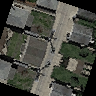

In [9]:
# first_im = []
# for i in range(0,625):
#     first_im.append(train_dataset.__getitem__(i))
    
# pils = transforms.ToPILImage()(first_im[4]['image'])
# pils

## Create Submission for AICrowd

In [10]:
# %run -i mask_to_submission.py